In [20]:
import torch 
from torch import nn 
import matplotlib.pyplot as plt


In [21]:
#buid some data using linear interpoylation regression simple equation

# y = weigh * x +bias 


weigh=0.7
bias=0.3 

x = torch.arange(0,1,0.02)
y=  weigh * x + bias

x.shape ,y.shape 

(torch.Size([50]), torch.Size([50]))

In [22]:
x[:5],y[:5]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560]))

In [23]:
# split the data into traning and testing [80% training ][20% testing]
train_split = int(0.8 * len(x))
x_train,x_test = x[:train_split],x[train_split:]

y_train,y_test = y[:train_split],y[train_split:]
len(y_train),len(y_test),len(x_test) 



(40, 10, 10)

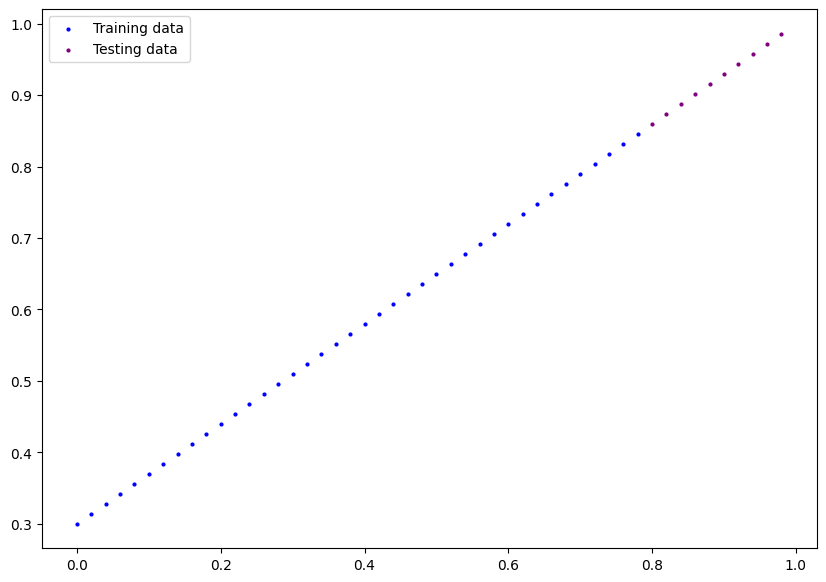

In [24]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
    # plot predictions is a function to plot data and if you have a prediction you can comapre to the original data 
    plt.figure(figsize=(10,7))
    # plot  the training data 
    plt.scatter(train_data, train_labels, label='Training data', color='blue',s=4)
    # plot the testing data
    plt.scatter(test_data, test_labels, label='Testing data', color='purple',s=4)
    
    # if predictions are provided plot them as well
    if predictions is not None:
        plt.scatter(test_data, predictions, label='Predictions', color='red',s=4)
    #show the legend 
    plt.legend()
    # show the plot
    plt.show()

plot_predictions()
    

#lets build the model 


In [25]:
#create a linear regression model 
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),
                                   requires_grad=True)#  requires_grad=True that means the parmater will be updates using the gradinet descent 
    def forward(self,x:torch.Tensor)->torch.Tensor:
        # this function takes in the input and returns the predicted output
        return self.weights * x + self.bias

In [26]:
# check the content of this model 
torch.manual_seed(42)
#crate an instance of the model class

model_0 = LinearRegressionModel()

In [27]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [29]:
#how to make a prediction using the model class
with torch.inference_mode():
    y_preds = model_0(x_test)




In [30]:
print(len(y_preds))
print(len(x_test))

10
10


In [31]:
y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

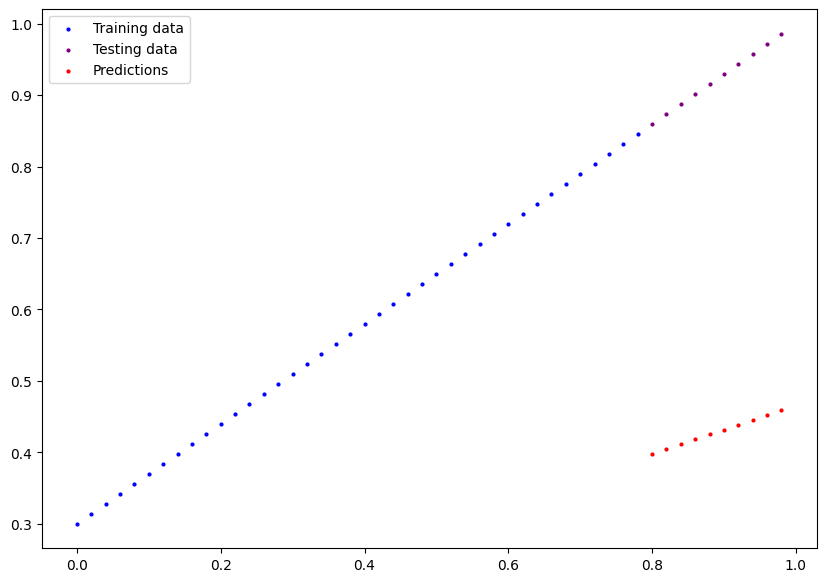

In [32]:
plot_predictions(predictions=y_preds)

#how to train the model


### 1.right now our model is making the predictions using random numbers
### 2.what  we want to do is to update the model parmeters ot reach the optimal parameters
### 3. we will use a loss function to measure the difference between the predicted and actual labels



## Creating a loss function 
loss function :that will calculate the difference between the predicte  
optimized :Guides your model to updates the parameters to lower the loss function (learning rate )



In [33]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

# Pytorch training loop and testing loop 

for the training loop ,well build the following steps 
1.Forwards pass 
2. Calculate the loss
3.Zero gradients
4.Perform backpropagation on the loss 
5.updata the optimizer (gradients descent)

In [ ]:
torch.manual_seed(42)   
epoches=1000
 
#Create some lists to track results
train_loss_values=[]
test_loss_values=[]
epoch_count=[]
for epoch in range(epoches):
    #training 
    model_0.train()
    # Pytorch training loop and testing loop 

 
  #1.Forwards pass
    y_pred=model_0(x_train) # -> (y_pred,y_train)
  #2. Calculate the loss
    loss=loss_fn(y_pred,y_train)
  #3.Zero gradients
    optimizer.zero_grad()
  #4.Perform backpropagation on the loss 
    loss.backward()
  #5.updata the optimizer (gradients descent)
    optimizer.step()


# testing
#put the model in the evaluation mode 
    model_0.eval()

    with torch.inference_mode():
        test_pred= model_0(x_test)
        # 2. calculate the test loss 
        test_loss=loss_fn(test_pred,y_test)

    if epoch %10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f'Epoch: {epoch}, Train Loss: {loss:.4f}, Test Loss: {test_loss:.4f}')


Epoch: 0, Train Loss: 0.0245, Test Loss: 0.0565
Epoch: 10, Train Loss: 0.0210, Test Loss: 0.0482
Epoch: 20, Train Loss: 0.0176, Test Loss: 0.0406
Epoch: 30, Train Loss: 0.0142, Test Loss: 0.0323
Epoch: 40, Train Loss: 0.0107, Test Loss: 0.0241
Epoch: 50, Train Loss: 0.0073, Test Loss: 0.0165
Epoch: 60, Train Loss: 0.0039, Test Loss: 0.0082
Epoch: 70, Train Loss: 0.0089, Test Loss: 0.0050
Epoch: 80, Train Loss: 0.0089, Test Loss: 0.0050
Epoch: 90, Train Loss: 0.0089, Test Loss: 0.0050
Epoch: 100, Train Loss: 0.0089, Test Loss: 0.0050
Epoch: 110, Train Loss: 0.0089, Test Loss: 0.0050
Epoch: 120, Train Loss: 0.0089, Test Loss: 0.0050
Epoch: 130, Train Loss: 0.0089, Test Loss: 0.0050
Epoch: 140, Train Loss: 0.0089, Test Loss: 0.0050
Epoch: 150, Train Loss: 0.0089, Test Loss: 0.0050
Epoch: 160, Train Loss: 0.0089, Test Loss: 0.0050
Epoch: 170, Train Loss: 0.0089, Test Loss: 0.0050
Epoch: 180, Train Loss: 0.0089, Test Loss: 0.0050
Epoch: 190, Train Loss: 0.0089, Test Loss: 0.0050
Epoch: 200,

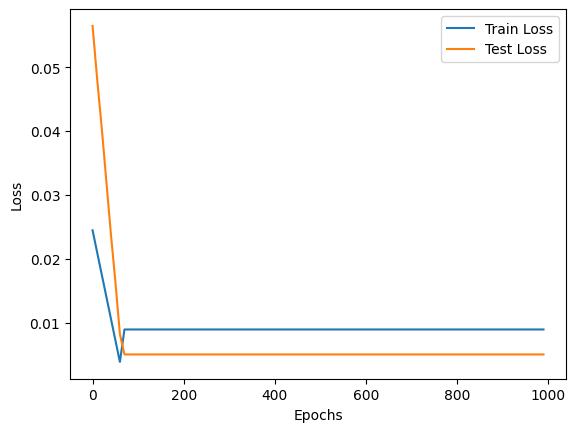

In [36]:
# plot the loss curves 

plt.plot(epoch_count,train_loss_values,label='Train Loss')
plt.plot(epoch_count,test_loss_values,label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

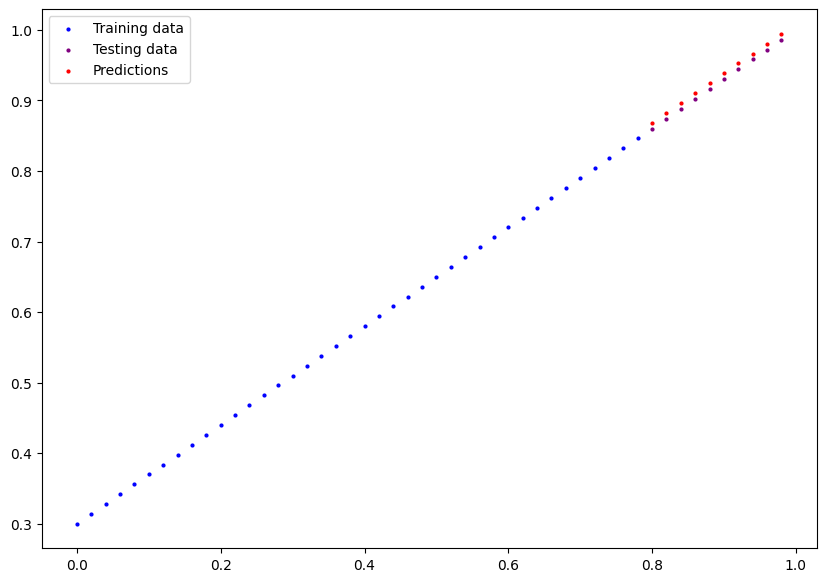

In [38]:
# we are going to make predictions which is called [inference]
#1- putting the model to eval mode -> evaluation mode 
#2 . with torch.inference_model() -> evaluation mode
# 3. make sure you model and your data are on the same device(Gpu or cpu )
model_0.eval()

with torch.inference_mode():
    y_pred=model_0(x_test)

plot_predictions(predictions=y_pred)

#